# Data Exploration

By: Rodrigo Hernández Mota

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from util.data_preparation import get_data

## Read Data

In [4]:

data = get_data().query("value != 'N/D'")
data["value"] = data["value"].values.astype(np.float)

print("Data shape: {}".format(data.shape))
data.describe()

Data shape: (30262, 6)


,value,year,month
count,30262.000000,30262.000000,30262.000000
mean,6195.503238,2011.351133,6.390225
std,10019.832325,3.368007,3.428319
min,1.000000,2006.000000,1.000000
25%,159.000000,2008.000000,3.000000
50%,1148.000000,2011.000000,6.000000
75%,7158.750000,2014.000000,9.000000
max,48638.000000,2017.000000,12.000000


In [5]:
# columns

def print_col_info(df, col):
    def get_unique(values):
        desc = "Unique Values: "
        for val in values.unique():
            desc += "\n\t " + val
        return desc
    def get_mean_std(values):
        return "\tMean: " + str(np.mean(values)) + "\n\t Std: " + str(np.std(values))
        
    info = """
    -----------------
    Column: {name}
    
    Data Type: {type}
    Desc:
    {desc}
    """
    values = df[col]
    desc = get_unique(values) if type("") == type(values[0]) else get_mean_std(values)
    print(info.format(
        name=col,
        type=type(values[0]),
        desc=desc
    ))
    

for col in data.columns:
    print_col_info(data, col)


    -----------------
    Column: economic_division
    
    Data Type: <class 'str'>
    Desc:
    Unique Values: 
	 Agricultura, ganadería, silvicultura, pesca y caza
	 Comercio
	 Industria de la construcción
	 Industria eléctrica, captación y suministro de agua potable
	 Industrias de transformación
	 Industrias extractivas
	 Servicios
	 Transportes y comunicaciones
    

    -----------------
    Column: gender
    
    Data Type: <class 'str'>
    Desc:
    Unique Values: 
	 Hombres
	 Mujeres
    

    -----------------
    Column: age_range
    
    Data Type: <class 'str'>
    Desc:
    Unique Values: 
	 De 15 a 19 años.
	 De 20 a 24 años.
	 De 25 a 29 años.
	 De 30 a 34 años.
	 De 35 a 39 años.
	 De 40 a 44 años.
	 De 45 a 49 años.
	 De 50 a 54 años.
	 De 55 a 59 años.
	 De 60 a 64 años.
	 De 65 a 69 años.
	 De 70 a 74 años.
	 De 75 ó más años
	 Menor a 15 años.
    

    -----------------
    Column: value
    
    Data Type: <class 'numpy.float64'>
    Desc:
    	Mean: 6195.

## Basic Exploration

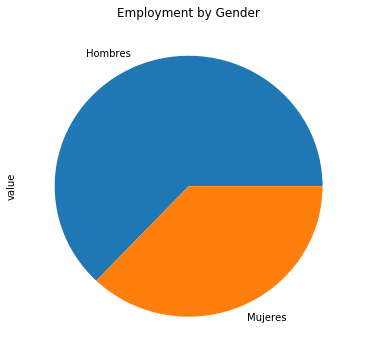

In [19]:
data.groupby("gender").value.sum().plot.pie(figsize=(6, 6))
plt.title("Employment by Gender")
plt.show()

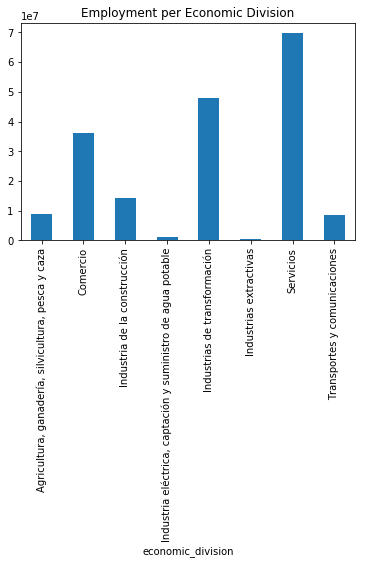

In [21]:
data.groupby("economic_division").value.sum().plot.bar()
plt.title("Employment per Economic Division")
plt.show()

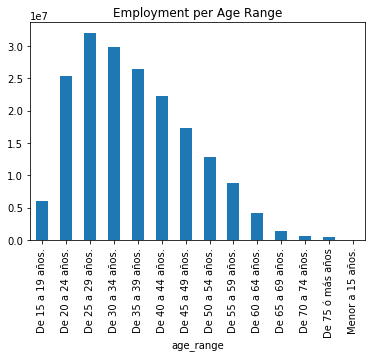

In [22]:
data.groupby("age_range").value.sum().plot.bar()
plt.title("Employment per Age Range")
plt.show()

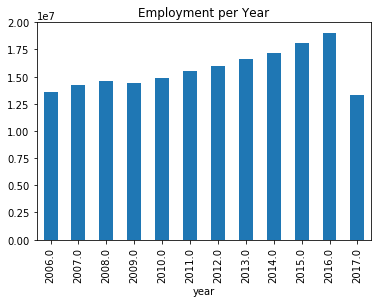

In [24]:
data.groupby("year").value.sum().plot.bar()
plt.title("Employment per Year")
plt.show()

## Time Series

In [141]:
data["time"] = (data.year  + data.month / 12).values

def df_by_levels(data, column):
    temp = {}
    temp_group = data.groupby(["time", column])[["value"]].sum()
    for element in data[column].unique():
        temp[element] = temp_group.xs(element, level=column).value.values
    return pd.DataFrame(temp, index=data.time.unique())

def plot_by_levels(data, column, title=""):
    df_by_levels(data, column).plot(figsize=(12, 6))
    plt.title(title)
    plt.xlabel("time")
    plt.ylabel("insured employment")
    plt.show()

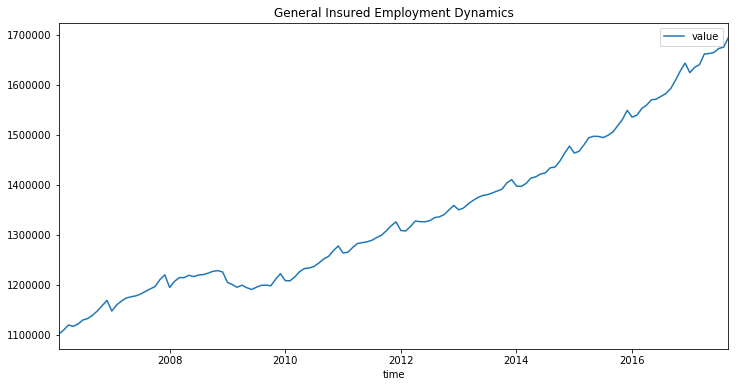

In [142]:
ts = data.groupby("time")[["value"]].sum()
ts.plot(figsize=(12, 6))
plt.title("General Insured Employment Dynamics")
plt.show()

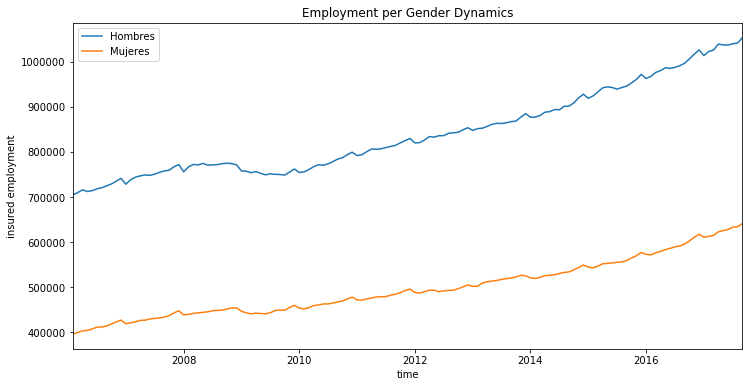

In [143]:
plot_by_levels(data, "gender", title="Employment per Gender Dynamics")

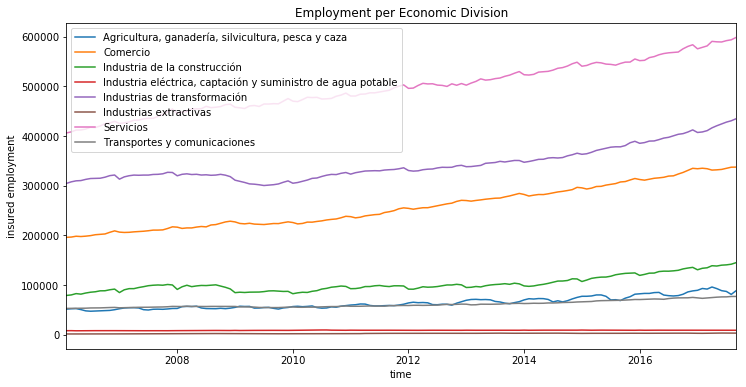

In [146]:
plot_by_levels(data, "economic_division", title="Employment per Economic Division")

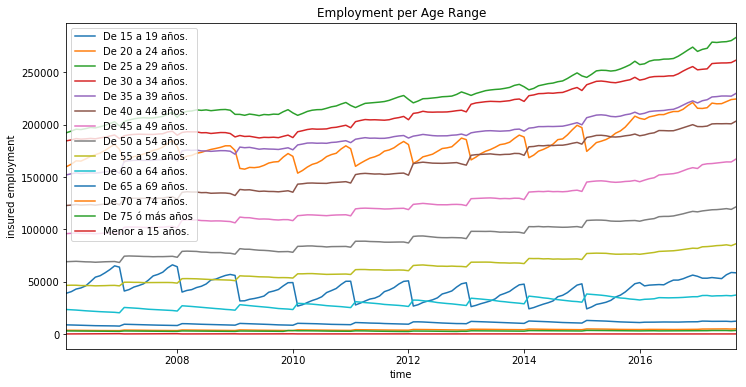

In [144]:
plot_by_levels(data, "age_range", title="Employment per Age Range")

## Scatter Plots

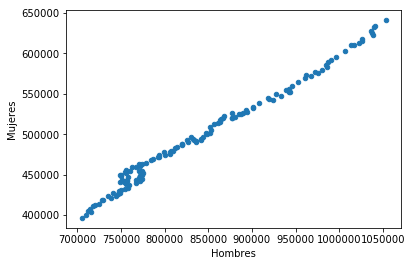

In [150]:
df_by_levels(data, "gender").plot.scatter(x="Hombres", y="Mujeres")

## Response Variable

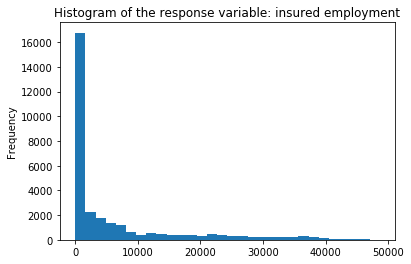

In [62]:
data.value.plot.hist(bins=30)
plt.title("Histogram of the response variable: insured employment")
plt.show()

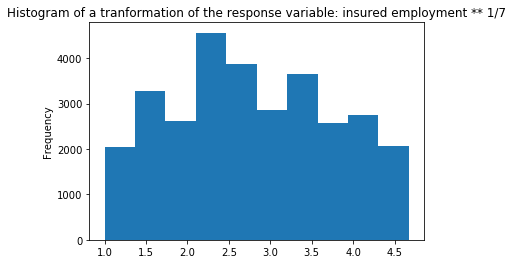

In [63]:
np.power(data.value, 1/7).plot.hist()
plt.title("Histogram of a tranformation of the response variable: insured employment ** 1/7")
plt.show()